# Module 3 - handling missing data

## Deletion methods

In [1]:
import pandas as pd
df = pd.read_csv(
    "https://raw.githubusercontent.com/kjam/data-cleaning-101/master/data/iot_example_with_nulls.csv",
    na_values=["n/a"]
)

In [2]:
df.head(5)

,timestamp,username,temperature,heartrate,build,latest,note
0,2017-01-01T12:00:23,michaelsmith,12.0,67,4e6a7805-8faa-2768-6ef6-eb3198b483ac,0.0,interval
1,2017-01-01T12:01:09,kharrison,6.0,78,7256b7b0-e502-f576-62ec-ed73533c9c84,0.0,wake
2,2017-01-01T12:01:34,smithadam,5.0,89,9226c94b-bb4b-a6c8-8e02-cb42b53e9c90,0.0,NaN
3,2017-01-01T12:02:09,eddierodriguez,28.0,76,NaN,0.0,update
4,2017-01-01T12:02:36,kenneth94,29.0,62,122f1c6a-403c-2221-6ed1-b5caa08f11e0,NaN,NaN


In [3]:
# compute the % of missing values
df.isnull().sum()*100 / df.shape[0]

,0
timestamp,0.000000
username,0.000000
temperature,22.102229
heartrate,0.000000
build,22.097447
latest,22.061927
note,33.268441


In [4]:
# delete a colum that contains more than 30% of missing data
df_dropped = df.drop(columns=["note"], axis=1)
df_dropped.head(5)

,timestamp,username,temperature,heartrate,build,latest
0,2017-01-01T12:00:23,michaelsmith,12.0,67,4e6a7805-8faa-2768-6ef6-eb3198b483ac,0.0
1,2017-01-01T12:01:09,kharrison,6.0,78,7256b7b0-e502-f576-62ec-ed73533c9c84,0.0
2,2017-01-01T12:01:34,smithadam,5.0,89,9226c94b-bb4b-a6c8-8e02-cb42b53e9c90,0.0
3,2017-01-01T12:02:09,eddierodriguez,28.0,76,NaN,0.0
4,2017-01-01T12:02:36,kenneth94,29.0,62,122f1c6a-403c-2221-6ed1-b5caa08f11e0,NaN


In [5]:
# Drop rows with any missing values
df_dropped = df.dropna()
df_dropped.isnull().sum()*100 /df_dropped.shape[0]

,0
timestamp,0.0
username,0.0
temperature,0.0
heartrate,0.0
build,0.0
latest,0.0
note,0.0


## Imputation with mean

In [6]:
temp_mean = round(df["temperature"].mean(),2)
print(temp_mean)

17.02


In [7]:
# Now we replace the missing values in the temperature column with the mean value
fill_mean = df["temperature"].fillna(temp_mean)
fill_mean.value_counts()

,count
temperature,
17.02,32357
29.00,4688
26.00,4674
16.00,4656
28.00,4648
10.00,4632
13.00,4629
7.00,4624
27.00,4621


## Statistical Imputation

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a date range
date_range = pd.date_range(start='2023-01-01', end='2023-12-31', freq='W')
# Generate random sales data
np.random.seed(42)  # For the same data
sales_data = np.random.uniform(12000, 15000, size=len(date_range)).round(2)

# Setting missing data
num_rows = len(sales_data)
num_sales_missing = 10
missing_sales_indices = np.random.choice(num_rows, size=min(num_sales_missing, num_rows), replace=False)
sales_data[missing_sales_indices] = np.nan

# Create the DataFrame
time_series_df = pd.DataFrame({
    'Date': date_range,
    'Sales': sales_data
})

# Set the Date column as the index
time_series_df.set_index('Date', inplace=True)
time_series_df.head(10)

,Sales
Date,
2023-01-01,13123.62
2023-01-08,14852.14
2023-01-15,14195.98
2023-01-22,NaN
2023-01-29,12468.06
2023-02-05,NaN
2023-02-12,12174.25
2023-02-19,14598.53
2023-02-26,13803.35


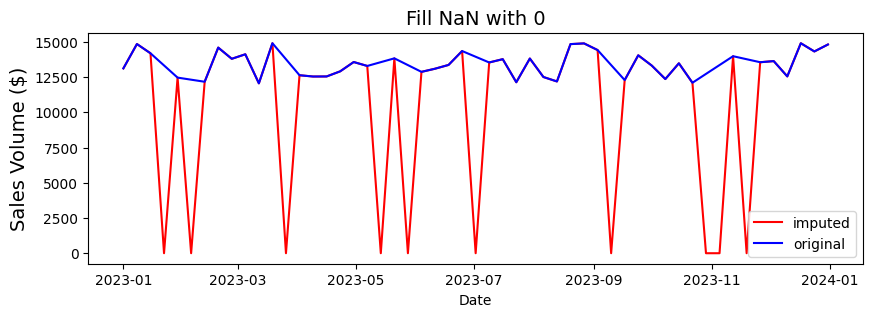

In [9]:
# Impute missing data with 0
imputed = time_series_df.copy()
imputed['Sales'] = imputed['Sales'].fillna(0)

plt.figure(figsize=(10, 3))
sns.lineplot(x=imputed.index, y=imputed['Sales'], color='red', label='imputed')
sns.lineplot(x=imputed.index, y=time_series_df['Sales'], color='blue', label='original')
plt.title('Fill NaN with 0', fontsize=14)
plt.ylabel('Sales Volume ($)', fontsize=14)
plt.legend()
plt.show()

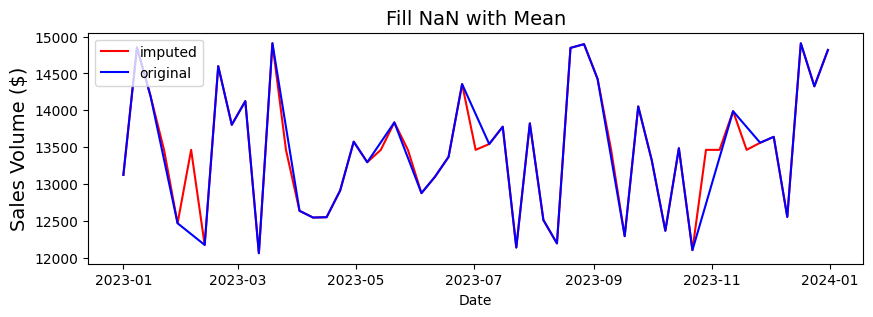

In [10]:
# Impute missing data average
imputed = time_series_df.copy()
avg_sales = time_series_df['Sales'].mean()
imputed['Sales'] = imputed['Sales'].fillna(avg_sales)

plt.figure(figsize=(10, 3))
sns.lineplot(x=imputed.index, y=imputed['Sales'], color='red', label='imputed')
sns.lineplot(x=imputed.index, y=time_series_df['Sales'], color='blue', label='original')
plt.title('Fill NaN with Mean', fontsize=14)
plt.ylabel('Sales Volume ($)', fontsize=14)
plt.legend()
plt.show()

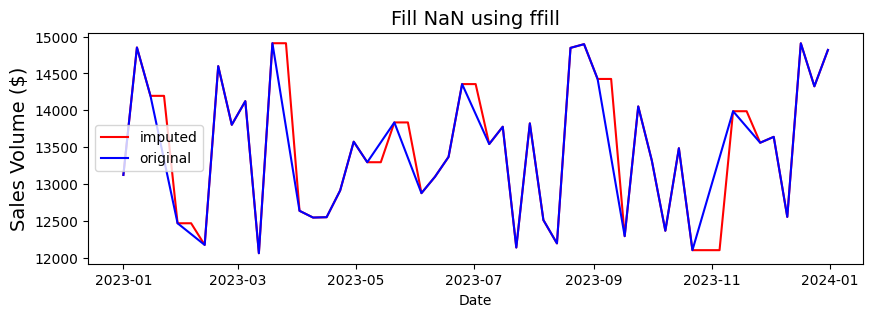

In [11]:
# Impute missing data using ffill
imputed = time_series_df.copy()
imputed['Sales'] = imputed['Sales'].ffill()

plt.figure(figsize=(10, 3))
sns.lineplot(x=imputed.index, y=imputed['Sales'], color='red', label='imputed')
sns.lineplot(x=imputed.index, y=time_series_df['Sales'], color='blue', label='original')
plt.title('Fill NaN using ffill', fontsize=14)
plt.ylabel('Sales Volume ($)', fontsize=14)
plt.legend()
plt.show()

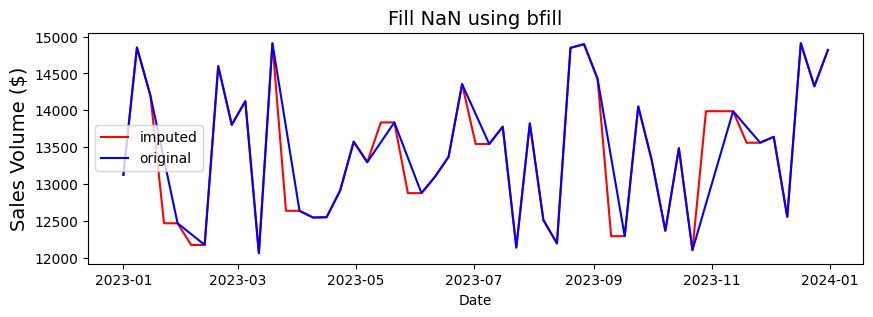

In [12]:
# Impute missing data using bfill
imputed = time_series_df.copy()
imputed['Sales'] = imputed['Sales'].bfill()

plt.figure(figsize=(10, 3))
sns.lineplot(x=imputed.index, y=imputed['Sales'], color='red', label='imputed')
sns.lineplot(x=imputed.index, y=time_series_df['Sales'], color='blue', label='original')
plt.title('Fill NaN using bfill', fontsize=14)
plt.ylabel('Sales Volume ($)', fontsize=14)
plt.legend()
plt.show()

## KNN Imputer

### Example 1

In [13]:
from sklearn.impute import KNNImputer
import pandas as pd

# Sample dataset
data = {'Age': [25, None, 26, 32],
        'Pclass': [1, 2, 1, 3],
        'Fare': [50, 60, None, 40],
        'Survived': [0, 1, 1, 0]}

df = pd.DataFrame(data)
df

,Age,Pclass,Fare,Survived
0,25.0,1,50.0,0
1,NaN,2,60.0,1
2,26.0,1,NaN,1
3,32.0,3,40.0,0


In [14]:
# Create KNNImputer instance with 2 nearest neighbors
imputer = KNNImputer(n_neighbors=2)
imputed_data = imputer.fit_transform(df)

In [15]:
# Fit and transform the dataset
df_imputed = pd.DataFrame(imputed_data, columns=df.columns)

print("Imputed Data:")
df_imputed

Imputed Data:


,Age,Pclass,Fare,Survived
0,25.0,1.0,50.0,0.0
1,25.5,2.0,60.0,1.0
2,26.0,1.0,55.0,1.0
3,32.0,3.0,40.0,0.0


### Example 2

In [16]:
from sklearn.datasets import load_iris
from sklearn.impute import KNNImputer
import numpy as np
np.random.seed(42)

# Load the Iris dataset
X, y = load_iris(return_X_y=True)
# Original data
print(X[0:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [17]:
# Introduce some NaN values to the different features
empty_axis_0 = np.random.choice(X.shape[0], size=40)
empty_axis_1 = np.random.choice(X.shape[1], size=40)

X_with_nan = X.copy()
# Imputed data
X_with_nan[empty_axis_0, empty_axis_1] = np.nan
X_with_nan[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , nan, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [18]:
imputer = KNNImputer(n_neighbors=5)
X_knn_imputed = imputer.fit_transform(X_with_nan)

In [19]:
# Imputed data
X_knn_imputed[0:10]

array([[5.1 , 3.5 , 1.4 , 0.2 ],
       [4.9 , 3.  , 1.52, 0.2 ],
       [4.7 , 3.2 , 1.3 , 0.2 ],
       [4.6 , 3.1 , 1.5 , 0.2 ],
       [5.  , 3.6 , 1.4 , 0.2 ],
       [5.4 , 3.9 , 1.7 , 0.4 ],
       [4.6 , 3.4 , 1.4 , 0.3 ],
       [5.  , 3.4 , 1.5 , 0.2 ],
       [4.4 , 2.9 , 1.4 , 0.2 ],
       [4.9 , 3.1 , 1.5 , 0.1 ]])

## MissForest Imputer

In [20]:
!pip install MissForest

In [21]:
data_url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv"

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from missforest import MissForest

# Load toy dataset.
df = pd.read_csv(data_url)

# Label encoding.
df["sex"] = df["sex"].map({"male": 0, "female": 1})
df["region"] = df["region"].map({"southwest": 0, "southeast": 1, "northwest": 2, "northeast": 3})
df["smoker"] = df["smoker"].map({"yes": 0, "no": 1})

# Create missing values.
for c in df.columns:
    n = int(len(df) * 0.1)
    rand_idx = np.random.choice(df.index, n)
    df.loc[rand_idx, c] = np.nan

# Split dataset into train and test sets.
train, test = train_test_split(df, test_size=.3, shuffle=True,
                               random_state=42)

categorical=["sex", "smoker", "region", "children"]

# Default estimators are lgbm classifier and regressor
mf = MissForest(categorical=categorical)
mf.fit(x=train)
train_imputed = mf.transform(x=train)
test_imputed = mf.transform(x=test)
train

/usr/local/lib/python3.11/dist-packages/missforest/missforest.py:333: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
100%|██████████| 5/5 [00:09<00:00,  1.85s/it]
/usr/local/lib/python3.11/dist-packages/missforest/missforest.py:490: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
/usr/local/lib/python3.11/dist-packages/missforest/missforest.py:494: UserWarning: In version 4.2.3, estimator fitting process is moved to `fit` method. `MissForest` will now imputes unseen missing values with fitted estimators with `transform` method. To retain the old behaviour, use `fit_transform` to fit the whole unseen data instead.
  warnings.warn(f"In version {VERSION}, estimator fitting process 

,age,sex,bmi,children,smoker,region,charges
332,61.0,1.0,31.160,0.0,1.0,2.0,13429.03540
355,NaN,0.0,27.600,NaN,1.0,0.0,24603.04837
138,54.0,1.0,31.900,3.0,1.0,1.0,27322.73386
381,55.0,0.0,30.685,0.0,0.0,3.0,42303.69215
292,25.0,0.0,45.540,NaN,0.0,1.0,NaN
...,...,...,...,...,...,...,...
1095,18.0,1.0,31.350,4.0,1.0,3.0,4561.18850
1130,39.0,1.0,23.870,NaN,1.0,1.0,NaN
1294,58.0,0.0,25.175,0.0,NaN,3.0,11931.12525
860,37.0,1.0,47.600,2.0,0.0,0.0,46113.51100


In [23]:
train_imputed.isnull().sum()

,0
children,0
charges,0
region,0
smoker,0
sex,0
bmi,0
age,0


In [24]:
train_imputed

,children,charges,region,smoker,sex,bmi,age
332,0.0,13429.035400,2.0,1.0,1.0,31.160000,61.000000
355,0.0,24603.048370,0.0,1.0,0.0,27.600000,46.000000
138,3.0,16524.137441,1.0,1.0,1.0,31.900000,54.000000
381,0.0,42303.692150,3.0,0.0,0.0,30.685000,55.000000
292,2.0,42112.235600,1.0,0.0,0.0,45.540000,25.000000
...,...,...,...,...,...,...,...
1095,4.0,4561.188500,3.0,1.0,1.0,31.350000,18.000000
1130,5.0,8582.302300,1.0,1.0,1.0,23.870000,39.000000
1294,0.0,11931.125250,3.0,1.0,0.0,25.175000,54.557398
860,2.0,46113.511000,0.0,0.0,1.0,37.288775,37.000000
